<a href="https://colab.research.google.com/github/danielavargel/Mnist/blob/main/final_daniel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import load_img

In [2]:
img_size = 100
snr = 10



In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


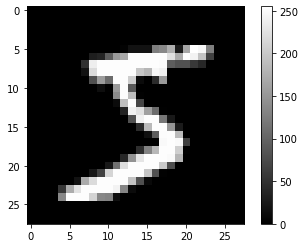

In [4]:
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
def generate_image(data, labels, img_size, snr):
  # Create a uniform random noisy image:
  I = np.random.uniform(0, 255/snr, (img_size, img_size, 1))

  data_image_size = data.shape    # Total number of digits images

  # Toss random coordinates (row & column) for placing the digit image in the noisy image:
  r,c = np.random.randint(0, img_size - data_image_size[1], 2)

  # Toss random digit image to place in the noisy image:
  digit_ind = np.random.randint(0,data_image_size[0],1)

  # Add the random digit image to the noisy image in the random location:
  I[r:r+data_image_size[1], c:c+data_image_size[1],0] = I[r:r+data_image_size[1], c:c+data_image_size[1],0] + data[digit_ind]

  # Return the full image, the random coordinates and the digit class:
  return I, r + data_image_size[1] // 2, c + data_image_size[1] // 2, labels[digit_ind][0]

Text(0.5, 1.0, '7@(27,25)')

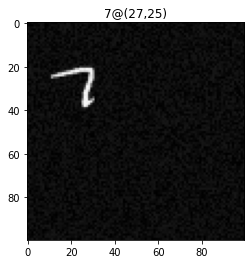

In [6]:
I, r, c, l = generate_image(x_train, y_train, img_size, 10)
plt.imshow(I[:,:,0], cmap='gray')
plt.title(str(l) + "@(" + str(r) + "," + str(c) + ")")

In [7]:
class DataGenerator(tf.keras.utils.Sequence):

  def __init__(self, class_flag = 1, pos_flag = 1, batch_size=128, image_size=img_size, dim = (img_size,img_size) ,n_channels=1,snr = 10,db_size = 50000):
    self.batch_size = batch_size
    self.image_size = image_size
    self.db_size = db_size
    self.snr = snr
    self.dim = dim
    self.n_channels = n_channels
    self.data_image_size = [28,28]
    self.class_flag = class_flag
    self.pos_flag = pos_flag


  def __len__(self):
    return self.db_size//self.batch_size


  def __getitem__(self, index):

    x = np.empty((self.batch_size, self.image_size, self.image_size, 1))

    if self.class_flag == 1 and self.pos_flag == 1:
      y = np.zeros((self.batch_size, 12)) 
      digit_image_size = 28

      # Generate data
      for i in range(self.batch_size):
        I, r, c, l = generate_image(x_train, y_train, self.image_size, self.snr)
        r = r - digit_image_size // 2
        c = c - digit_image_size // 2
        x[i] = I / 255.0
        y[i,l] = 1           # One hot encoding of the class
        y[i,10:12] = [r / (self.image_size - digit_image_size),c / (self.image_size - digit_image_size)]   # Coordinates
      return x, y

    elif self.class_flag == 1: #class
        y = np.zeros((self.batch_size, 10)) 
        digit_image_size = 28
             
       # Generate data
        for i in range(self.batch_size):
          I, r, c, l = generate_image(x_train, y_train, self.image_size, self.snr)
          r = r - digit_image_size // 2
          c = c - digit_image_size // 2
          x[i] = I / 255.0
          y[i,l] = 1           # One hot encoding of the class
        return x, y

    elif self.pos_flag == 1: #class
        y = np.zeros((self.batch_size, 2)) 
        digit_image_size = 28
             
       # Generate data
        for i in range(self.batch_size):
          I, r, c, l = generate_image(x_train, y_train, self.image_size, self.snr)
          r = r - digit_image_size // 2
          c = c - digit_image_size // 2
          x[i] = I / 255.0
          y[i,0:2] = [r / (self.image_size - digit_image_size),c / (self.image_size - digit_image_size)]   # Coordinates
        return x,y
    
    


(100, 100, 1)
[0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.47222222 0.86111111]


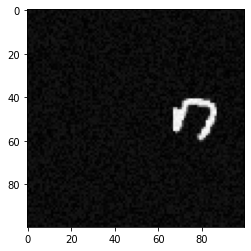

In [8]:
class_training_generator = DataGenerator( 1,0, img_size)
pos_training_generator = DataGenerator( 0,1, img_size)
training_generator = DataGenerator(1,1, img_size) #all
test_generator  = DataGenerator(1,1, img_size) #all
class_test_generator = DataGenerator( 1,0, img_size)
pos_test_generator = DataGenerator( 0,1, img_size)
x,y = training_generator.__getitem__(0)
ind = 0
x = x[ind]
y = y[ind]
print(x.shape)
plt.imshow(x[:,:,0], cmap='gray')
print(y)


(100, 100, 100, 1)
(100, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


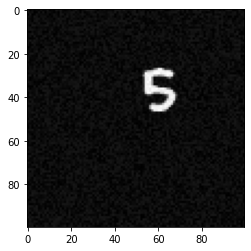

In [9]:
x1,y1 = class_training_generator.__getitem__(2)
print(x1.shape)
print(y1.shape)
ind = 0
x1 = x1[ind]
y1 = y1[ind]
plt.imshow(x1[:,:,0], cmap='gray')
print(y1)


[0.18055556 0.97222222]


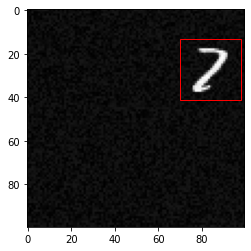

In [10]:
x2,y2 = pos_training_generator.__getitem__(3000)
ind = 0
x2 = x2[ind]
y2 = y2[ind]
ax = plt.subplot(1,1,1)
plt.imshow(x2[:,:,0], cmap='gray')
norm =  pos_training_generator.image_size - pos_training_generator.data_image_size[0]
#Create a Rectangle patch
rect = patches.Rectangle((y2[1] * norm , y2[0] * norm), pos_training_generator.data_image_size[1], pos_training_generator.data_image_size[0], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

print(y2)

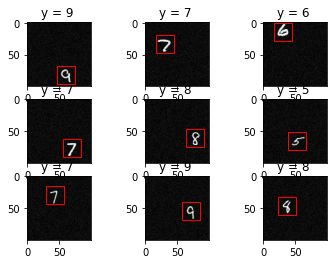

In [11]:
# Unit test for 
for n in range(9):
  x,y = training_generator.__getitem__(n)
  ind = 0
  x = x[ind]
  y = y[ind]
  for i in range(10):
    if y[i] == 1:
      label = i

  ax = plt.subplot(3,3,n+1)
  plt.imshow(x[:,:,0], cmap='gray')
  norm =  training_generator.image_size - training_generator.data_image_size[0]

  #Create a Rectangle patch
  rect = patches.Rectangle((y[11] * norm , y[10] * norm), training_generator.data_image_size[1], training_generator.data_image_size[0], linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

  plt.title(f'y = {label} ')

In [12]:
# Build neural network for training
input_shape0 =  (img_size,img_size,1)
model = tf.keras.Sequential()
model.net_name = 'mymodel'

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape0))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))



In [13]:

model_class = tf.keras.Sequential([model,
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512),
                                   tf.keras.layers.Activation('relu'),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.Dense(10),
                                   tf.keras.layers.Activation('softmax')])

model_pos = tf.keras.Sequential([model,
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512),
                                tf.keras.layers.Activation('sigmoid'),
                                tf.keras.layers.Dropout(0.3),
                                tf.keras.layers.Dense(2),
                                tf.keras.layers.Activation('sigmoid')])


model_class.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_pos.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])


In [14]:
history_2 = model_pos.fit_generator(generator=pos_training_generator, epochs=15, validation_data=pos_test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
143/500 [=======>......................] - ETA: 27:13 - loss: 0.0088 - mse: 0.0088

KeyboardInterrupt: ignored

In [ ]:
history_1 = model_class.fit_generator(generator=class_training_generator, epochs=10 , validation_data=class_test_generator)

In [ ]:
def show_predictions(X, y, pred):
  plt.imshow(X[:,:,0], cmap='gray')
  #plt.plot(pred[0], pred[1], 'r+')
  for k in range(10):
    if y[k] == 1:
      label = k
  plt.title('Y: ' + str(label) + '  Predict : ' + str(pred[2]), fontsize=12, y=1)
  #plt.title(str(pred[2]))
  #Create a Rectangle patch
  norm =  pos_training_generator.image_size - pos_training_generator.data_image_size[0]
  rect = patches.Rectangle((pred[0] -pos_training_generator.data_image_size[0] / 2 , pred[1] -pos_training_generator.data_image_size[0] /2), 28, 28, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)
  ax.margins(0)
  ax.autoscale()

fig = plt.gcf()
fig.set_size_inches(20, 20)


for i in range (30):
  X,y = test_generator.__getitem__(i)
  #X,y = training_generator.__getitem__(i)
  pred_class = model_class.predict(X)
  pred_pos = model_pos.predict(X)
  ax = plt.subplot(5,6,i+1)
  ind = 0
  X = X[ind]
  y = y[ind]
  pred_class = pred_class[ind]
  #print(pred_class)
  pred_pos = pred_pos[ind]
  #print(pred_pos)
  show_predictions(X,y, [pred_pos[1] * (img_size - 28) + 28 // 2, pred_pos[0] * (img_size - 28) + 28 // 2, np.argmax(pred_class[0:10])])

In [ ]:
# Load Image and Reshape
def load_image(filename):
    #img = Image.open(filename).convert('L')

    #return np.reshape(img, (img_size, 1, img_size, 1))

    test_image = load_img(filename,color_mode="grayscale",target_size=(img_size,img_size,1))
    print(test_image.format)
    print(test_image.mode)
    print(test_image.size)

    test_image = image.img_to_array(test_image)
    test_image = test_image / 255
    test_image  = test_image.reshape((-1,) + test_image.shape)
    return test_image


In [ ]:
X = load_image('6_2.png')
fig = plt.gcf()
fig.set_size_inches(10, 10)
#X,y = training_generator.__getitem__(i)
pred_class = model_class.predict(X)
pred_pos = model_pos.predict(X)
ind = 0
plt.subplot(3,3,i+1)
X = X[ind]
#y = y[ind]
pred_class = pred_class[ind]
print(pred_class)
pred_pos = pred_pos[ind]
print(pred_pos)
show_predictions(X,y, [pred_pos[1] * (img_size - 28) + 28 // 2, pred_pos[0] * (img_size - 28) + 28 // 2, np.argmax(pred_class[0:10])])